# Clustering with sktime

In clustering, we're interested in using past data to make temporal forward predictions. `sktime` will provide clustering algorithms based on scikit-learn's.


<img src="img/clustering.png" width=750 />

<br>Illustration made by [Josue](https://github.com/JosueDavalos)


In [1]:
from sktime.datasets import load_italy_power_demand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans as KMeans
from matplotlib.patches import Patch


%run -i _time_kmeans.py
%run -i _time_dbscan.py
%run -i plotting.py

### Load Dataset 

In [2]:
X, y = load_italy_power_demand(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [0]], y)
X_train.head()

,dim_0
815,0 -0.78543 1 -1.22770 2 -1.56470 3 ...
83,0 -0.059532 1 -0.496100 2 -0.892980 3...
17,0 -1.025400 1 -1.420200 2 -1.595700 3...
805,0 -0.77320 1 -1.22530 2 -1.49650 3 ...
279,0 -0.764070 1 -1.150100 2 -1.375300 3...


The dataset used is labeled, however for illustration purposes we will assume that it is an unlabeled dataset. <br>Next, we will visualize the time series by classes.

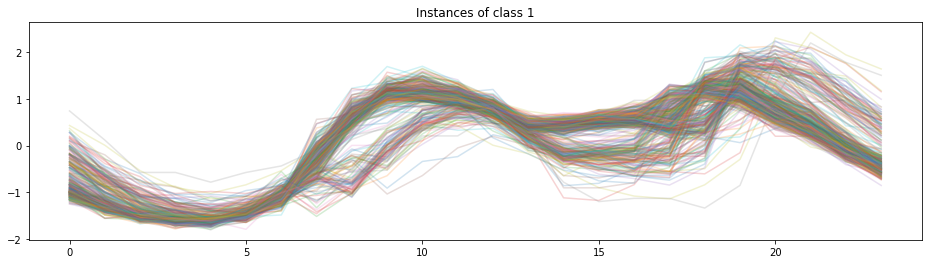

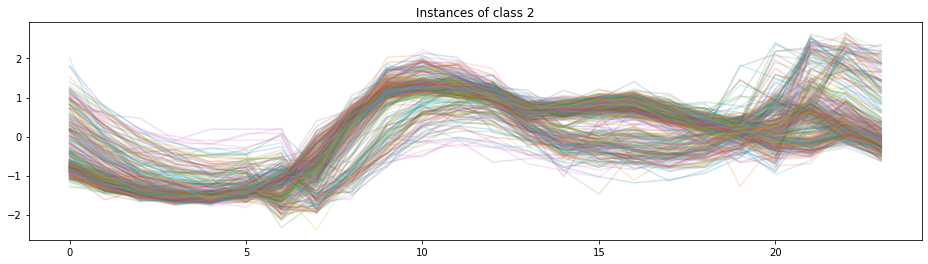

In [3]:
for label in np.unique(y_train):
    fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
    for instance in X_train.loc[y_train == label, "dim_0"]:
        ax.plot(instance, alpha=.2)
    ax.set(title=f"Instances of class {label}")

## Clusteing
### - Kmeans

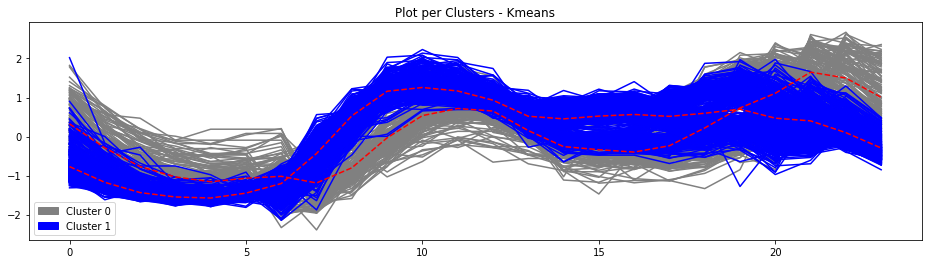

In [4]:
km = KMeamsTimeSeries(n_clusters=2)
km.fit(X_train)
labels_kmeans = km.labels_
centers = km.cluster_centers_

plot_clusters(X_train, labels_kmeans, 'dim_0', 'Kmeans', plot_per_cluster=False, kmean_center=centers)

If you want to plot each cluster separately, you can even set the variable `plot_per_cluster` as `True`.

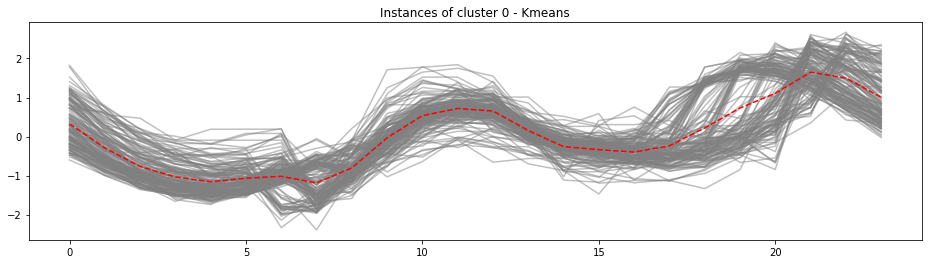

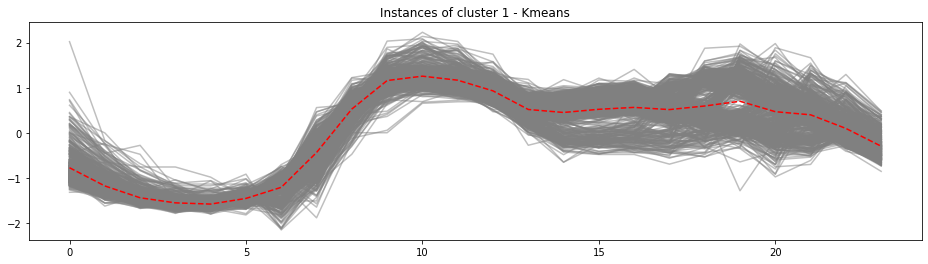

In [5]:
plot_clusters(X_train, labels_kmeans, 'dim_0', 'Kmeans', plot_per_cluster=True, kmean_center=centers)

The red lines represent the central series of each cluster.

### - DBScan

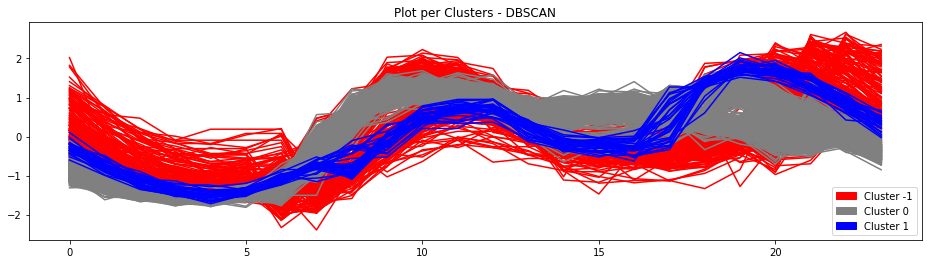

In [6]:
dbscan = DBSCANTimeSeries(eps=1, min_samples=15, metric="euclidean")
dbscan.fit(X_train)
labels_dbscan = dbscan.labels_

plot_clusters(X_train, labels_dbscan, 'dim_0', 'DBSCAN', plot_per_cluster=False)

With this algorithm we can change the distance metric. Another possible metric is DTW.

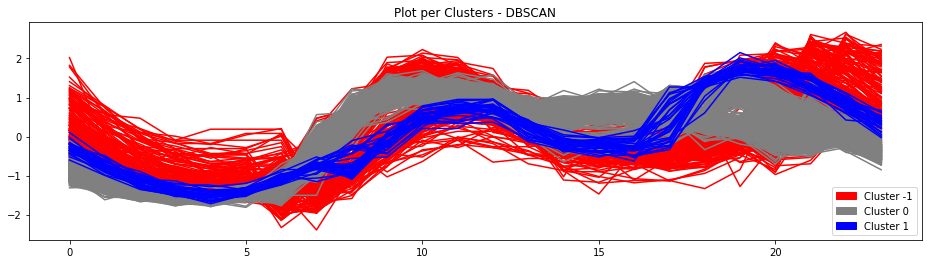

In [7]:
dbscan = DBSCANTimeSeries(eps=1, min_samples=15, metric="dtw")
dbscan.fit(X_train)
labels_dbscan = dbscan.labels_

plot_clusters(X_train, labels_dbscan, 'dim_0', 'DBSCAN',  plot_per_cluster=False)